KOSPI200.KS
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- KOSPI200.KS: No data found for this date range, symbol may be delisted


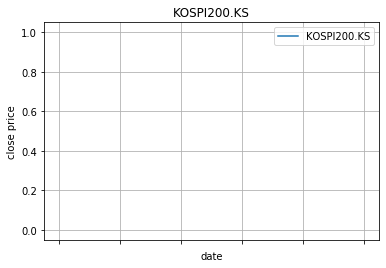

005935.KS
[*********************100%***********************]  1 of 1 completed


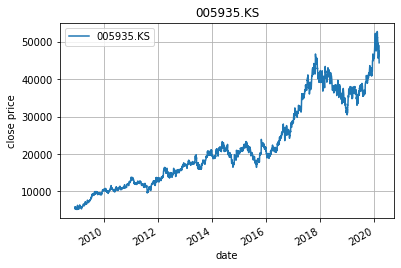

252670.KS
[*********************100%***********************]  1 of 1 completed


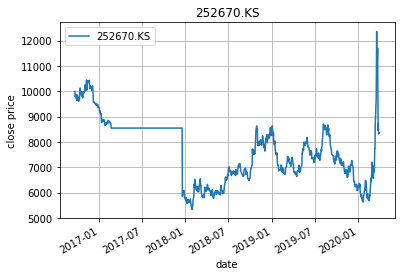

In [2]:
# https://medium.com/@jouneidraza522/yahoo-finance-api-to-get-stocks-tickers-data-in-python-c49820249a18
# https://towardsdatascience.com/collect-trading-data-with-pandas-library-8904659f2122
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
from datetime import date
import yfinance as yf
yf.pdr_override()
import pandas as pd

# Tickers list
# We can add and delete any ticker from the list to get desired ticker live data
ticker_list=['DJIA', 'PXD', 'MCHP', 'CRM', 'JEC', 'NRG', 'HFC', 'NOW', 'AMZN','DAL','207940.KS']
ticker_list=['114800.KS', '122630.KS', '219480.KS', '207940.KS']
ticker_list=['005930.KS', '005935.KS', '000660.KS', '005380.KS', '012330.KS', '035420.KS',
             '051910.KS', '068270.KS', '017670.KS', '055550.KS', '207940.KS', '122630.KS']
ticker_list=['KOSPI200.KS', '005935.KS', '252670.KS']
today = date.today()
# We can get data by our choice by giving days bracket
start_date= "2008-11-30"
end_date="2020-03-10"
files=[]

def getData(ticker):
    print (ticker)
    data = pdr.get_data_yahoo(ticker, start=start_date, end=today)
    dataname= ticker+'_'+str(today)
    files.append(dataname)
    SaveData(data, dataname)
    return(data)

# Create a data folder in your current dir.
def SaveData(df, filename):
    df.to_csv('./stockmarket/'+filename+'.csv')
#     print(df)

newDF=[]
#This loop will iterate over ticker list, will pass one ticker to get data, and save that data as file.
for tik in ticker_list:
    newDF = getData(tik)
    close = newDF[['Close']]
    # rename the column with symbole name
    symbol = tik
    close = close.rename(columns={'Close': symbol})
    ax = close.plot(title=tik)
    ax.set_xlabel('date')
    ax.set_ylabel('close price')
    ax.grid()
    plt.show()

# for i in range(0,11):
#     df1= pd.read_csv('./data/'+ str(files[i])+'.csv')
#     print (df1.head())



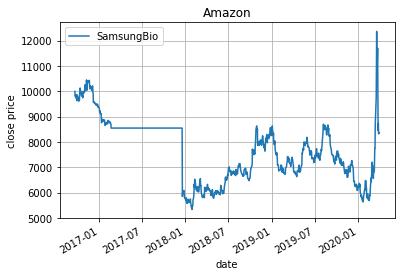

In [3]:
# select only close column
# df = ticker_list['207940.KS']
import matplotlib.pyplot as plt
df = newDF
close = df[['Close']]
# rename the column with symbole name
symbol = 'SamsungBio'
close = close.rename(columns={'Close': symbol})
ax = close.plot(title='Amazon')
ax.set_xlabel('date')
ax.set_ylabel('close price')
ax.grid()
plt.show()

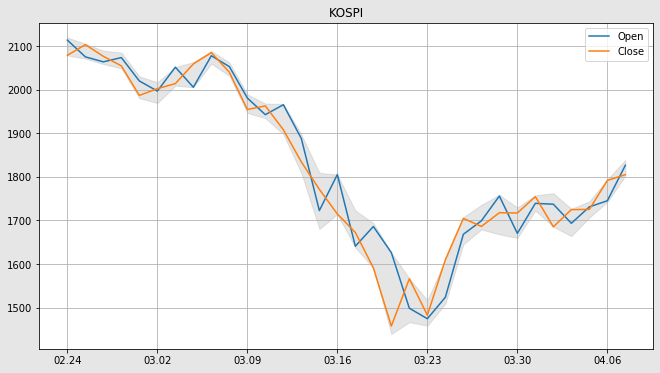

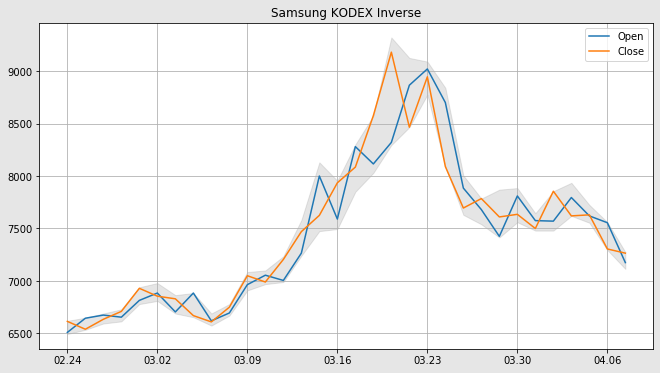

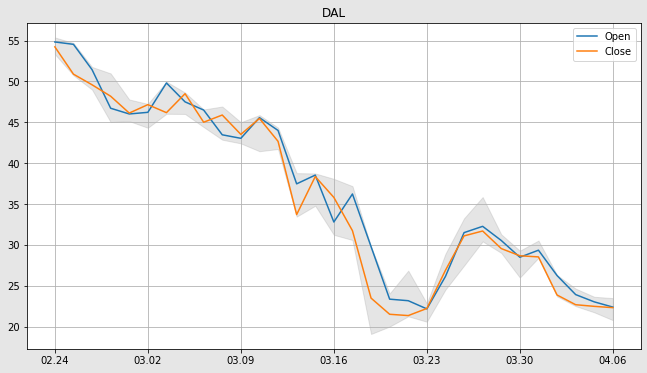

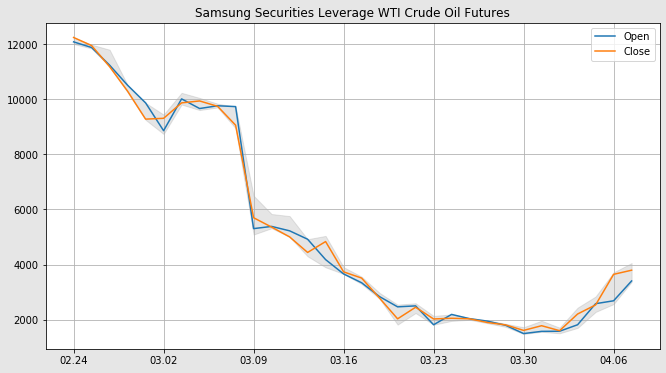

In [1]:
import matplotlib.pyplot as plt
import investpy
from datetime import date, datetime, timedelta
import matplotlib.dates as mdates

# fromDate = '01/03/2020'
tickFreq = 5
today = date.today()
fromDate = today - timedelta(weeks=6) - timedelta(days=1)
fromDate = fromDate.strftime("%d/%m/%Y")

class gcAsset:
    def __init__(self, name, kind, country, fromDate, interval='Daily'):
        if country == 'us': country = 'united states' 
        if country == 'korea': country = 'south korea'
        self.name = name
        if kind == 'etf':
            self.df = investpy.get_etf_historical_data(etf=name,
                                    country=country,
                                    interval=interval,
                                    from_date=fromDate,
                                    to_date=today.strftime("%d/%m/%Y"))
        elif kind == 'index':
            self.df = investpy.get_index_historical_data(index=name,
                                    country=country,
                                    interval=interval,
                                    from_date=fromDate,
                                    to_date=today.strftime("%d/%m/%Y"))  
        elif kind == 'stock':
            self.df = investpy.get_stock_historical_data(stock=name,
                                            country=country,
                                            from_date=fromDate,
                                            to_date=today.strftime("%d/%m/%Y"),
                                            as_json=False, order='ascending')  
        else:
            return('missing kind')
        self.df = self.df[~(self.df.iloc[:,1] == self.df.iloc[:,2])]

    def plot(self):
        fig = plt.figure(figsize=[11,6])

        ax = fig.add_subplot(1,1,1)
        ax.plot(range(self.df.index.size), self.df[['Open','Close']])

        ax.set_xticks(range(0,self.df.index.size,tickFreq))
        xTickLabels = list(self.df.index.strftime("%m.%d"))[::tickFreq]
        ax.set_xticklabels(xTickLabels)

        ax.legend(('Open','Close'))
        ax.set_title(self.name)

        ax.fill_between(range(self.df.index.size), self.df['Low'], self.df['High'], color='Gray', alpha=0.2)
        ax.grid(True)
        fig.patch.set_facecolor((0.9, 0.9, 0.9))    
            
asset = 'KOSPI 200'
asset = 'KOSPI 200 Future'
asset = 'KOSPI 200 Futures Inverse'
asset = 'KOSPI'

KP = gcAsset('KOSPI', 'index', 'korea', fromDate)
KP.plot()

KP_I = gcAsset('Samsung KODEX Inverse', 'etf', 'korea', fromDate)
KP_I.plot()

DAL = gcAsset('DAL', 'stock', 'us', fromDate)
DAL.plot()

WTI = gcAsset('Samsung Securities Leverage WTI Crude Oil Futures', 'etf', 'korea', fromDate)
WTI.plot()